<a href="https://colab.research.google.com/github/bharath7896/IEEE-CIS-Fraud-detection/blob/master/fraud_detection_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
import lightgbm as lgb
import gc
from time import time
import datetime
from tqdm import tqdm_notebook
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold,GroupKFold
from sklearn.metrics import roc_auc_score
warnings.simplefilter('ignore')
sns.set()
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bharat724","key":"91ff3d467ffdc60c1b27bd417b75ef3a"}'}

In [ ]:
!mkdir  ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c ieee-fraud-detection

 63% 33.0M/52.5M [00:00<00:00, 36.9MB/s]
100% 52.5M/52.5M [00:00<00:00, 77.0MB/s]
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 101MB/s]
 87% 41.0M/47.3M [00:00<00:00, 103MB/s]
100% 47.3M/47.3M [00:00<00:00, 136MB/s]
  0% 0.00/2.97M [00:00<?, ?B/s]
100% 2.97M/2.97M [00:00<00:00, 98.1MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 76.0MB/s]


In [ ]:
!unzip train_transaction.csv.zip
!unzip train_identity.csv.zip
!unzip test_transaction.csv.zip
!unzip test_identity.csv.zip
!unzip sample_submission.csv.zip

Archive:  train_transaction.csv.zip
  inflating: train_transaction.csv   
Archive:  train_identity.csv.zip
  inflating: train_identity.csv      
Archive:  test_transaction.csv.zip
  inflating: test_transaction.csv    
Archive:  test_identity.csv.zip
  inflating: test_identity.csv       
Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


In [ ]:
train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')
sub = pd.read_csv('sample_submission.csv')
#merging the train data and test data
train_data = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test_data = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')


In [ ]:
del train_identity, train_transaction, test_identity, test_transaction

In [ ]:
import pandas_profiling
report = pandas_profiling.ProfileReport(train_data)


In [ ]:
import pandas_profiling
rejected_variables = pandas_profiling.ProfileReport(train_data).get_rejected_variables(threshold=0.9)

In [ ]:
rejected_variables 

['C10',
 'C11',
 'C12',
 'C14',
 'C2',
 'C4',
 'C6',
 'C7',
 'C8',
 'C9',
 'D12',
 'D2',
 'D6',
 'D7',
 'TransactionDT',
 'V101',
 'V102',
 'V103',
 'V105',
 'V106',
 'V11',
 'V113',
 'V126',
 'V127',
 'V128',
 'V13',
 'V132',
 'V133',
 'V134',
 'V137',
 'V140',
 'V143',
 'V145',
 'V147',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V16',
 'V160',
 'V163',
 'V164',
 'V167',
 'V168',
 'V177',
 'V178',
 'V179',
 'V18',
 'V182',
 'V183',
 'V190',
 'V192',
 'V193',
 'V196',
 'V197',
 'V198',
 'V199',
 'V20',
 'V201',
 'V202',
 'V203',
 'V204',
 'V206',
 'V207',
 'V21',
 'V211',
 'V212',
 'V213',
 'V216',
 'V217',
 'V218',
 'V219',
 'V22',
 'V222',
 'V225',
 'V231',
 'V232',
 'V233',
 'V235',
 'V236',
 'V237',
 'V239',
 'V243',
 'V244',
 'V245',
 'V249',
 'V251',
 'V253',
 'V254',
 'V256',
 'V257',
 'V259',
 'V263',
 'V265',
 'V266',
 'V269',
 'V271',
 'V272',
 'V273',
 'V274',
 'V275',
 'V276',
 'V277',
 'V278',
 'V279',
 'V28',
 'V28

In [ ]:
train_data = train_data.drop(columns=rejected_variables)
test_data = test_data.drop(columns=rejected_variables)

In [ ]:
train_data = train_data.drop(columns=['TransactionID','id_07','id_08','id_18','id_21','id_22','id_23','id_24','id_25','id_26','id_27'])
test_data = test_data.drop(columns=['TransactionID','id_07','id_08','id_18','id_21','id_22','id_23','id_24','id_25','id_26','id_27'])

In [ ]:
#Printing train data and test data sizes
print('TRAIN DATA SHAPE IS :',train_data.shape)
print('TEST DATA SHAPE IS ',test_data.shape)

TRAIN DATA SHAPE IS : (590540, 227)
TEST DATA SHAPE IS  (506691, 226)


<function matplotlib.pyplot.show>

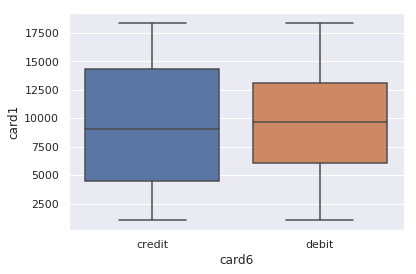

In [ ]:
x_dict = x_trfraud.groupby(by=['card1','card6']).groups
x_plot = sns.boxplot(y=x_trfraud['card1'], x=x_trfraud['card6'])
plt.show

In [ ]:
prec = [.25, .50, .75, .90]
obj = ['object', 'float', 'int']
train_data.describe(percentiles =prec,include = obj )

isFraud  TransactionDT  ...  DeviceType DeviceInfo
count   590540.000000   5.905400e+05  ...      140810     118666
unique            NaN            NaN  ...           2       1786
top               NaN            NaN  ...     desktop    Windows
freq              NaN            NaN  ...       85165      47722
mean         0.034990   7.372311e+06  ...         NaN        NaN
std          0.183755   4.617224e+06  ...         NaN        NaN
min          0.000000   8.640000e+04  ...         NaN        NaN
25%          0.000000   3.027058e+06  ...         NaN        NaN
50%          0.000000   7.306528e+06  ...         NaN        NaN
75%          0.000000   1.124662e+07  ...         NaN        NaN
90%          0.000000   1.399091e+07  ...         NaN        NaN
max          1.000000   1.581113e+07  ...         NaN        NaN

[12 rows x 228 columns]

In [ ]:
test_data = test_data.drop(columns=['dist2','D8','id_03','id_04','id_09','id_10','id_30','id_33','id_34'])

In [ ]:
train_data = train_data.drop(columns=['dist2','D8','id_03','id_04','id_09','id_10','id_30','id_33','id_34'])

In [ ]:
train_data['card6']=train_data['card6'].interpolate(method='pad')
train_data['card4']=train_data['card4'].interpolate(method='pad')
train_data['P_emaildomain'] = train_data['P_emaildomain'].interpolate(method='pad')
train_data['R_emaildomain'] = train_data['R_emaildomain'].interpolate(method='ffill',inplace=False)
train_data['DeviceType'] = train_data['DeviceType'].interpolate(method='pad')
train_data['DeviceInfo']= train_data['DeviceInfo'].interpolate(method='pad')
train_data['id_31'] = train_data['id_31'].interpolate(method='pad')
train_data['id_35'] = train_data['id_35'].interpolate(method='pad')
train_data['id_36'] = train_data['id_36'].interpolate(method='pad')
train_data['id_37'] = train_data['id_37'].interpolate(method='pad')
train_data['id_38'] = train_data['id_38'].interpolate(method='pad')


In [ ]:
train_data.iloc[:,np.where(train_data.dtypes==np.float)[0]].fillna(-999.0)

In [ ]:
train_data.fillna(-999)

In [ ]:
x_train = train_data.drop(columns=['isFraud'],axis=1)
y_train = train_data['isFraud']

In [ ]:
train_data['isFraud'].value_counts().to_frame()

isFraud
0   569877
1    20663

In [ ]:
majority = train_data[train_data.isFraud==0].dropna(thresh=2)
majority = majority[majority.notnull()]

minority = train_data[train_data.isFraud==1]

# using negative downsampling with bagging
from sklearn.utils import resample
from sklearn.utils import shuffle
negative_downsample1 = resample(majority,replace =False, n_samples=20663, random_state=1)
negative_downsample2 = resample(majority,replace =False, n_samples=20663, random_state=2)
negative_downsample3 = resample(majority,replace =False, n_samples=20663, random_state=3)
negative_downsample4 = resample(majority,replace =False, n_samples=20663, random_state=4)
negative_downsample5 = resample(majority,replace =False, n_samples=20663, random_state=5)
negative_downsample6 = resample(majority,replace =False, n_samples=20663, random_state=7)
negative_downsample7 = resample(majority,replace =False, n_samples=20663, random_state=14)
d1 = pd.concat([negative_downsample1,minority])
d2 = pd.concat([negative_downsample2,minority])
d3 = pd.concat([negative_downsample3,minority])
d4 = pd.concat([negative_downsample4,minority])
d5 = pd.concat([negative_downsample5,minority])
d6 = pd.concat([negative_downsample6,minority])
d7 = pd.concat([negative_downsample7,minority])
print(d1.shape, d2.shape, d3.shape, d4.shape, d5.shape, d6.shape, d7.shape)
d = [d1,d2,d3,d4,d5,d6,d7]
for ds in d:
  ds = shuffle(ds)
  is_num = np.where(ds.dtypes == np.float)[0]
  num_feature = ds.iloc[:,is_num]
  is_cat = np.where(ds.dtypes != np.float)[0]
  cat_feature = ds.iloc[:,is_cat]
  num_feature =num_feature.fillna(-999.0)
  num_feature = num_feature.astype('float32')
  cat_feature = pd.DataFrame(cat_feature)
  cat_feature = cat_feature.fillna(-999)
  cat_feature = cat_feature.apply(lambda x: x.astype('category'))

(41326, 218) (41326, 218) (41326, 218) (41326, 218) (41326, 218) (41326, 218) (41326, 218)


In [ ]:
  num_feature.isnull().sum()


In [ ]:
  cat_feature.isnull().sum()


In [ ]:
X_train = ds.drop(['isFraud'], axis =1)
Y_train = ds['isFraud']

In [ ]:
num_feature = np.array(num_feature)
cat_feature = np.array(cat_feature)


In [ ]:
# columns containing categorical variables
is_cat = np.where(test_data.dtypes != np.float)[0]
cat_features = test_data.iloc[:,is_cat]


In [ ]:
cat_list = list(cat_features.columns)
for categs in cat_list:
  test_data[categs]=test_data[categs].interpolate(method='pad')
  test_data[categs]=test_data[categs].astype('category').cat.codes
  


In [ ]:
X_train.iloc[:,38:196].head()
X_train = X_train.fillna(-999)


In [ ]:
test_data = test_data.fillna(-999)
test_data.isnull().sum()

In [ ]:
import featuretools as ft


In [ ]:
!pip install parfit
!pip install -U catboost

In [ ]:
import catboost
from catboost import CatBoostClassifier, Pool,cv
from catboost.eval.catboost_evaluation import *
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)


## HYPER PARAMETER TUNING USING GRID-SEARCH 

In [ ]:
from sklearn.model_selection import KFold
from itertools import product,chain

params = {
          'iterations':[100,250,500,1000],
          'learning_rate':[0.03,0.001,0.01]
          
          

          }

In [ ]:
from catboost import *
cb.grid_search(param_grid=params,
            X=X_train,
            y=Y_train,
            cv=2,
            partition_random_seed=7,
            calc_cv_statistics=True,
            search_by_train_test_split=True,
            refit=True,
            shuffle=True,
            stratified=6,
            train_size=0.9,
            verbose=True)

0:	loss: 0.9028235	best: 0.9028235 (0)	total: 36.8s	remaining: 6m 44s
1:	loss: 0.8454528	best: 0.9028235 (0)	total: 1m 17s	remaining: 6m 27s
2:	loss: 0.8949969	best: 0.9028235 (0)	total: 1m 58s	remaining: 5m 56s
3:	loss: 0.9230059	best: 0.9230059 (3)	total: 3m 40s	remaining: 7m 21s
4:	loss: 0.8699880	best: 0.9230059 (3)	total: 5m 58s	remaining: 8m 22s
5:	loss: 0.9109690	best: 0.9230059 (3)	total: 8m 14s	remaining: 8m 14s
6:	loss: 0.9369874	best: 0.9369874 (6)	total: 11m 47s	remaining: 8m 25s
7:	loss: 0.8876257	best: 0.9369874 (6)	total: 16m 20s	remaining: 8m 10s
8:	loss: 0.9209651	best: 0.9369874 (6)	total: 20m 23s	remaining: 6m 47s
9:	loss: 0.9486812	best: 0.9486812 (9)	total: 29m 5s	remaining: 5m 49s
10:	loss: 0.8985971	best: 0.9486812 (9)	total: 38m 24s	remaining: 3m 29s
11:	loss: 0.9299058	best: 0.9486812 (9)	total: 45m 13s	remaining: 0us
Estimating final quality...


{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
import parfit as pf
best_model, best_score, all_models, all_scores = pf.bestFit(CatBoostClassifier(), params, 
     X_train, Y_train,test_data, 
     metric=roc_auc_score,scoreLabel='AUC')
print(best_model)   

In [ ]:
cb=CatBoostClassifier(iterations=1000,
                        learning_rate=0.03,
                         depth=8,
                         l2_leaf_reg=20,
                        
                         rsm=0.02,
                         loss_function='Logloss:border=1.5',
                         border_count = 128,
                         per_float_feature_quantization='is_num[:border_count=128][:nan_mode=BorderType][:border_type=border_selection_method]' ,
                         input_borders='Min',
                         output_borders=None,
                         fold_permutation_block=6,
                         od_pval=0.05,
                         
                         od_type='IncToDec',
                         nan_mode='Min',
                         counter_calc_method=None,
                         target_border = 0.5,
                         sparse_features_conflict_fraction=0.4,
                         leaf_estimation_iterations=None,
                         leaf_estimation_method='Gradient',
                         thread_count=4,
                         use_best_model=True,
                         verbose=100,

                         classes_count=2,
                         one_hot_max_size=1,
                         random_strength=1.2,
                         ignored_features=
                         train_dir= X_train,
                         custom_metric=['Logloss','AUC:hints=skip_train~false'],
                         eval_metric='AUC',
                         boosting_type='Plain',
                         bagging_temperature = 3,      
                         

                         bootstrap_type='Bayesian',
                         sampling_unit='Group',
                         random_state=7,
                         reg_lambda=None,
                         cat_features=cat_feature,
                         score_function='Correlation',
                         leaf_estimation_backtracking='Armijo'
                         )

In [ ]:
cb = CatBoostClassifier(iterations=1000,learning_rate=0.03,depth=8,loss_function='Logloss',
                        bootstrap_type='Bayesian',cat_features=cat_feature,nan_mode='Min',eval_metric='AUC')
                         

In [ ]:
y_pred_train = cb.fit(X_train,Y_train)

In [ ]:
y_train_pred = cb.predict(X_train)
y_test_pred = cb.predict(test_data)

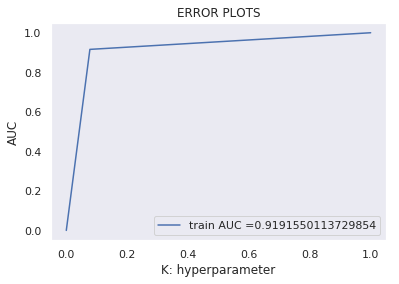

In [ ]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr, tr_thresholds ))) 
 
plt.legend() 
plt.xlabel("hyperparameter") 
plt.ylabel("AUC") 
plt.title("ERROR PLOTS") 
plt.grid() 
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
feat_labels = list(X_train.columns)
len(feat_labels)

217

In [ ]:
from sklearn.metrics import roc_curve, auc
for feat in zip(feat_labels, cb.feature_importances_):
    print(feat)

('TransactionAmt', 4.05975317392417)
('ProductCD', 3.9689923216045417)
('card1', 13.606741319796747)
('card2', 0.3981334776607459)
('card3', 0.7184540010372469)
('card4', 0.1750650796425615)
('card5', 0.1620021510665136)
('card6', 0.8150440602261391)
('addr1', 0.4266044149412992)
('addr2', 0.06960978390278866)
('dist1', 0.7473278457963674)
('P_emaildomain', 3.167200334394102)
('R_emaildomain', 0.9096435536280266)
('C1', 14.738816056476749)
('C3', 0.07767126061467372)
('C5', 1.8343129295330485)
('C13', 9.640117143820435)
('D1', 1.221843807039896)
('D3', 0.9168798617320776)
('D4', 1.0192588226288941)
('D5', 0.22193340608862086)
('D9', 0.027322435007417677)
('D10', 0.439509494152308)
('D11', 0.18549344552293923)
('D13', 0.38689476746744855)
('D14', 0.09978728822385413)
('D15', 1.9663084527890016)
('M1', 0.0011320749214624498)
('M2', 0.21647748532046504)
('M3', 0.2716176194851556)
('M4', 0.317441987553054)
('M5', 0.4005488701437645)
('M6', 1.09780165091149)
('M7', 0.1833454984522127)
('M8'

In [ ]:
cb.eval_metrics(data=test_data, metrics='AUC')

In [ ]:
sub['isFraud']